#From clicks to contacts: assessing consumer response to ads

#Task 1: Define the Problem

Determine if a user cicked on the ad based on the data.

#Task 2a: Install the Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as ply
import plotly.express as px
import plotly.io as pio
import scipy as sc
import sympy as sy
import matplotlib as matplot
import statistics as stat
import seaborn as sns

#Task 2b: Import the Needed Libraries

#Task 3: Load the Data

In [ ]:
ads = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


##Get Data Info

In [ ]:
ads.describe

<bound method NDFrame.describe of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgen

In [ ]:
ads.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
ads.info

<bound method DataFrame.info of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgener

##Find Missing Values
###no missing data

ads AxesSubplot(0.125,0.125;0.62x0.755)
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


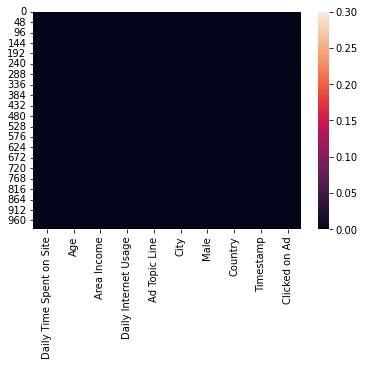

In [ ]:
#generate missing counts and heat maps to assess missing data
print("ads",sns.heatmap(ads.isnull(),cbar=True,vmin=0,vmax=.3))
print(ads.isnull().sum())

#Task 5: Perform Data Cleaning

In [ ]:
#how many distinct values are there for each variable?
n = ads.nunique(axis=0)
print("No.of.unique values in each column:\n",
      n)


No.of.unique values in each column:
 Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64


In [ ]:
#are there outliers or weird formatting?
ads


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [ ]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
#getting rid of decimals
ads = ads.round(0)

In [ ]:
#removing variables that won't be actionable. I'm assuming these are online ads. 
#I don't think time of day matters (and it can't be controlled by the advertiser). 
#Likewise, cit might have an effect (rich places vs poor) but seems trivial in this context.
#I'm on the fence about country but i think it could be important.
ads.drop(['Timestamp','City'], axis=1, inplace=True)

In [ ]:
#The names of things should be treated as strings, not objects
ads['Country'] = ads['Country'].astype('string')
ads['Ad Topic Line'] = ads['Ad Topic Line'].astype('string')


#Task 6: Visualize Cleaned up Dataset

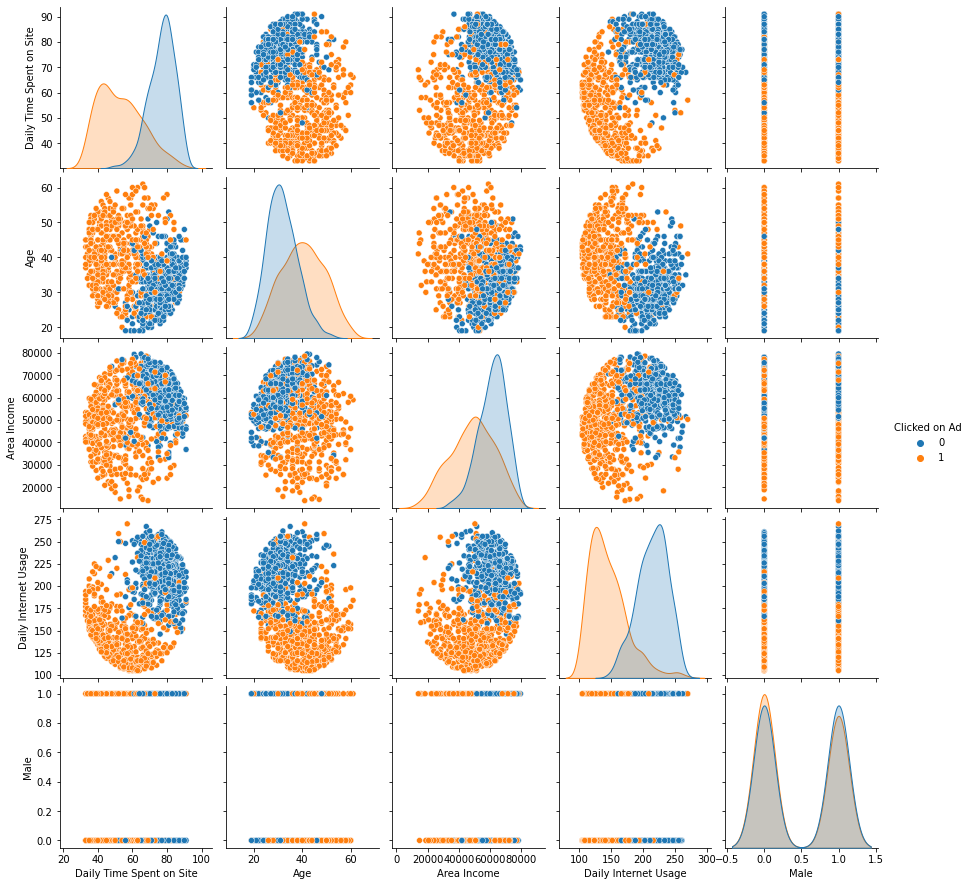

In [ ]:
sns.pairplot(ads,hue="Clicked on Ad")

#Task 7: Conceptualize the problem

###Of the remaing variables, which can be used as a predictor of clicks?
###Negative and positive associations are both of interest

#Task 8: Perform Data-Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

#Task 9: Choose the ML Method to follow

###Using logistic regression


#Task 10: Train the ML Model

In [ ]:
#playing with a slightly smaller train set
X_train, X_test, Y_train, Y_test = train_test_split(ads.drop('Clicked on Ad',axis=1), ads['Clicked on Ad'], test_size = 0.35, random_state = 17)

#Task 11: Test the Model
##I got the error "ValueError: could not convert string to float: 'Assimilated next generation firmware'" every time I tried to specify my regression model

In [ ]:
#got "ValueError: could not convert string to float: 'Assimilated next generation firmware'"
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

ValueError: ignored

In [ ]:
#trying to find the line that caused the error
#did not succeed
import re, sys, collections
for line in ads:
    if re.search("(.*)next(.*)", line):
        print(line),


In [ ]:
#trying to find the line that caused the error
#did not succeed
import re, sys, collections
for line in ads:
    if re.search("(.*)next(.*)", line):
        print(line),


In [ ]:
#trying with new version of df
regressor2 = LogisticRegression()
regressor2.fit(X_train,Y_train)

ValueError: ignored